In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile("/content/drive/MyDrive/DermaQ/image_dir.zip","r") as zip_ref:
    zip_ref.extractall("/content/image_dir")

In [ ]:
image_dir_path = "/content/image_dir/image_dir"

In [ ]:
import torch
import torchvision
import torchvision.transforms as t
import torch.utils.data as data
import torch.nn.functional as f
from PIL import Image
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split

import os
import random
from tqdm import tqdm


In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
trans_total = t.Compose([
    t.Resize(384, interpolation=t.InterpolationMode.BILINEAR),
    t.CenterCrop(384),
    t.ToTensor(),
    t.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
total_train_data  = torchvision.datasets.ImageFolder(root = image_dir_path, transform = trans_total)

In [ ]:
class_names = total_train_data.classes
num_classes = len(class_names)

# Initialize a NumPy array to keep track of counts
class_counts = np.zeros(num_classes, dtype=int)

# Iterate through each class
for i, class_name in enumerate(class_names):
    class_folder_path = os.path.join(image_dir_path, class_name)

    # Check if the path is a directory
    if os.path.isdir(class_folder_path):

        # Get the list of files with a specific extension (e.g., '.jpg')
        files_in_class = [file for file in os.listdir(class_folder_path) if file.endswith('.jpg')]

        # Get the count of files in the class folder
        file_count = len(files_in_class)

        # Update the class counts array
        class_counts[i] = file_count

# Calculate frequencies for each class
print(class_counts)

[ 70 159 335  64  53 151 387  60 211  62  63  43  63  86  66  78  71 136
  60 200  66  77 202  86  89  70  61  37 195  72  55  97 240  80 164  49
  77  82  76  52  94 118 113 133  66  46  83  51 261  47  60 302 104 128
  90 111 175 102  65  69  99  25  58 102 134  69 103  52 271  83  95  76
  57  74  59 295  77  47  53  98 103  56  67 113  59 113 549  53 113  79
  99 316 201 266  71  76  69  66 369  65 113  64  66 118  79 113  68 100
  45 116 108 123  53  71]


12630

In [ ]:
weights = 12630 / (114 * class_counts)
print(weights)

[1.58270677 0.69678914 0.33071485 1.73108553 2.09036743 0.73370512
 0.28627771 1.84649123 0.5250686  1.78692699 1.75856307 2.57649939
 1.75856307 1.28824969 1.67862839 1.42037787 1.56041512 0.81462848
 1.84649123 0.55394737 1.67862839 1.43882433 0.54846274 1.28824969
 1.24482555 1.58270677 1.81622088 2.9943101  0.56815115 1.53874269
 2.01435407 1.14215952 0.46162281 1.38486842 0.67554557 2.26100967
 1.43882433 1.35109114 1.45775623 2.1305668  1.17861142 0.93889384
 0.98043782 0.83300356 1.67862839 2.40846682 1.33481294 2.17234262
 0.42448074 2.35722284 1.84649123 0.36685256 1.0652834  0.86554276
 1.23099415 0.99810337 0.63308271 1.08617131 1.70445344 1.60564455
 1.11908559 4.43157895 1.91016334 1.08617131 0.82678712 1.60564455
 1.07562596 2.1305668  0.40881725 1.33481294 1.16620499 1.45775623
 1.94367498 1.49715505 1.87778769 0.37555754 1.43882433 2.35722284
 2.09036743 1.13050483 1.07562596 1.97838346 1.65357423 0.98043782
 1.87778769 0.98043782 0.20180232 2.09036743 0.98043782 1.4023

In [ ]:
total_train_data[1]

(tensor([[[ 0.8276,  0.8104,  0.7762,  ..., -1.2274, -1.1075, -1.2103],
          [ 0.8104,  0.7933,  0.7591,  ..., -1.2103, -1.0904, -1.1589],
          [ 0.8276,  0.8104,  0.7762,  ..., -1.2274, -1.0733, -1.1418],
          ...,
          [ 0.0741,  0.1597,  0.1768,  ..., -1.5357, -1.5357, -1.5357],
          [ 0.1083,  0.1426,  0.1254,  ..., -1.5528, -1.5357, -1.4672],
          [ 0.0741,  0.1083,  0.0912,  ..., -1.5014, -1.5185, -1.5014]],
 
         [[ 0.1001,  0.0476,  0.0126,  ..., -1.6856, -1.5805, -1.6856],
          [ 0.0651,  0.0301,  0.0126,  ..., -1.6681, -1.5455, -1.6155],
          [ 0.0476,  0.0476,  0.0301,  ..., -1.6681, -1.5105, -1.5805],
          ...,
          [-0.5826, -0.4951, -0.4601,  ..., -1.3704, -1.3354, -1.3354],
          [-0.5476, -0.4951, -0.4601,  ..., -1.4055, -1.3880, -1.3179],
          [-0.5826, -0.5126, -0.4951,  ..., -1.3529, -1.3704, -1.3529]],
 
         [[ 0.2348,  0.2522,  0.2696,  ..., -1.4907, -1.3513, -1.4559],
          [ 0.2871,  0.2522,

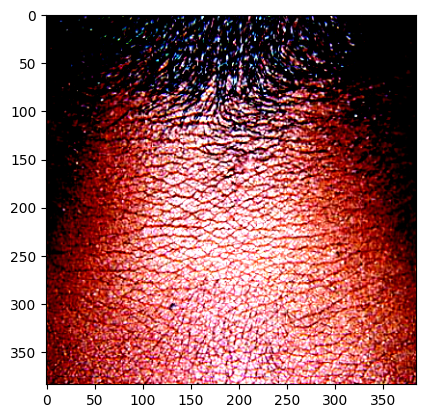

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sample = total_train_data[0]  # Change the index as needed

# Extract the image tensor and label from the tuple
image_tensor, label = sample[0], sample[1]

# Convert the PyTorch tensor to a NumPy array
image_array = image_tensor.permute(1, 2, 0).numpy()

# Clip values to the valid range [0, 1] in case they are outside that range
image_array = np.clip(image_array, 0, 1)

# Display the image using matplotlib
plt.imshow(image_array)
plt.show()

In [ ]:
print(total_train_data.targets)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [ ]:
print(total_train_data.classes)

['acanthosis_nigricans', 'acne', 'acne_vulgaris', 'acquired_autoimmune_bullous_diseaseherpes_gestationis', 'acrodermatitis_enteropathica', 'actinic_keratosis', 'allergic_contact_dermatitis', 'aplasia_cutis', 'basal_cell_carcinoma', 'basal_cell_carcinoma_morpheiform', 'becker_nevus', 'behcets_disease', 'calcinosis_cutis', 'cheilitis', 'congenital_nevus', 'dariers_disease', 'dermatofibroma', 'dermatomyositis', 'disseminated_actinic_porokeratosis', 'drug_eruption', 'drug_induced_pigmentary_changes', 'dyshidrotic_eczema', 'eczema', 'ehlers_danlos_syndrome', 'epidermal_nevus', 'epidermolysis_bullosa', 'erythema_annulare_centrifigum', 'erythema_elevatum_diutinum', 'erythema_multiforme', 'erythema_nodosum', 'factitial_dermatitis', 'fixed_eruptions', 'folliculitis', 'fordyce_spots', 'granuloma_annulare', 'granuloma_pyogenic', 'hailey_hailey_disease', 'halo_nevus', 'hidradenitis', 'ichthyosis_vulgaris', 'incontinentia_pigmenti', 'juvenile_xanthogranuloma', 'kaposi_sarcoma', 'keloid', 'keratosis

In [ ]:
# Stratified Sampling for train and val
train_idx, validation_idx = train_test_split(np.arange(len(total_train_data)),
                                             test_size=0.2,
                                             random_state=999,
                                             shuffle=True,
                                             stratify=total_train_data.targets)

# Subset dataset for train and val
train_dataset = data.Subset(total_train_data, train_idx)
valid_dataset = data.Subset(total_train_data, validation_idx)

# Dataloader for train and val
train_loader = data.DataLoader(train_dataset, batch_size=1, shuffle=True)
valid_loader = data.DataLoader(valid_dataset, batch_size=1, shuffle=False)

In [ ]:
print(len(train_dataset))
print(len(valid_dataset))

10104
2526


In [ ]:
model = torchvision.models.efficientnet_v2_s(weights='IMAGENET1K_V1')

Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth
100%|██████████| 82.7M/82.7M [00:01<00:00, 77.8MB/s]


In [ ]:
model.classifier = torch.nn.Sequential(
                        torch.nn.Dropout(p=0.2, inplace=True),
                        torch.nn.Linear(1280, 114)
                    )

In [ ]:
torch.save(model, "/content/drive/MyDrive/DermaQ/best_checkpoint.pt")


In [ ]:
print(model)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
class Trainer(object):

    def __init__(self, model, criterion, optimizer, max_epoch):
        """
            model: nn model
            criterion: loss function
            optimizer: optimizer
            max_epoch: maximum training epoch
        """
        self.model = model.to(device)
        self.criterion = criterion.to(device)
        self.optimizer = optimizer
        self.max_epoch = max_epoch

    def run(self,train_loader, valid_loader):
        """
            Main entry
                train_loader: training dataset, each item is (img, label)
                valid_loader: validation dataset, each item is (img, label)
        """
        # calculate the inital loss and accu on validation set
        valid_best_loss = self.validate(-1, valid_loader, best_loss=None)
        for epoch in range(self.max_epoch):
            self.train(epoch, train_loader)
            # save the checkpoint with the lowest validation loss
            valid_best_loss = self.validate(epoch, valid_loader, valid_best_loss)

    def train(self, epoch, loader):
        """
            Single training loop
                epoch: int, current epoch index
                loader: training loader
        """
        # switch to the train mode, calculate the gradient
        self.model.train()
        running_loss, total, correct = 0.0, 0, 0
        with tqdm(enumerate(loader, 0), mininterval=10) as tepoch:
            for i, data in tepoch:
                # get the inputs; data is a list of [inputs, labels]
                # inputs: tensor, (batch_size, image_size, image_size)
                # labels: tensor, (batch_size, 1)
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)

                ########################################################
                # TODO: replace the outputs and loss and update optimizer
                # 1. zero the parameter gradients
                # 2. forward + backward
                # 3. update the parameters
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                ########################################################

                # calculate the metric
                match, number = self.cal_metric(outputs.data, labels)

                # gather statistics
                total += number
                correct += match
                running_loss += loss.item()
                tepoch.set_postfix(loss=loss.item(), accuracy=100. * correct / total)

        running_loss /= len(loader)
        torch.save(self.model, '/content/drive/MyDrive/DermaQ/best_checkpoint.pt')
        print('Training | Epoch: {}| Loss: {:.3f} | Accuracy on train images: {:.1f}'.format \
              (epoch+1, running_loss, 100 * correct / total))

    def validate(self, epoch, loader, best_loss=None):
        """
            Single evaluation loop
                epoch: int, current epoch index
                loader: validation loader
                best_loss: float, current best loss
        """
        # switch to the evaluation mode, do not need to calculate the gradient
        self.model.eval()
        running_loss, total, correct = 0.0, 0, 0
        for i, data in tqdm(enumerate(loader)):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            ########################################################
            # TODO: replace the outputs and loss
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            ########################################################

            # calculate the metric
            match, number = self.cal_metric(outputs.data, labels)

            # gather statistics
            total += number
            correct += match
            running_loss += loss.item()

        running_loss /= len(loader)

        save_file = '/content/drive/MyDrive/DermaQ/best_epoch{}_loss{:.2f}_accu{:.2f}.pt'.format(epoch+1, running_loss, 100 * correct / total)
        print('Save to file: ', save_file)
        torch.save(self.model, save_file)

        if best_loss is None or running_loss < best_loss:
            # if a better loss appears, save the checkpoin

            # overwrite the best_checkpoint.pt file
            torch.save(self.model, '/content/drive/MyDrive/DermaQ/best_checkpoint.pt')

            best_loss = running_loss

        print('Validation | Epoch: {}| Loss: {:.3f} | Accuracy on val images: {:.1f}'.format \
        (epoch+1, running_loss,100 * correct / total))

        return best_loss


    def cal_metric(self, outputs, labels):
        """
            Calculate the accuracy
                outputs: tensor (batch_size, number_class), the output of the model
                labels: tensor (batch_size, 1), the ground truth
        """
        # compare predictions to ground truth
        _, predicted = torch.max(outputs, 1)
        number = labels.size(0)
        correct = (predicted == labels).sum().item()
        return correct, number



In [ ]:
NUM_EPOCH = 15
LEARNING_RATE = 0.001

criterion = torch.nn.CrossEntropyLoss(weight= torch.tensor(weights, dtype=torch.float32))
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)
#optimizer = optim.Adagrad(model.parameters(), lr=LEARNING_RATE)
trainer = Trainer(model, criterion, optimizer, max_epoch=NUM_EPOCH)

In [ ]:
trainer.run(train_loader, valid_loader)

2526it [01:51, 22.63it/s]


Save to file:  /content/drive/MyDrive/DermaQ/best_epoch0_loss151.54_accu3.96.pt
Validation | Epoch: 0| Loss: 151.535 | Accuracy on val images: 4.0


10104it [15:04, 11.18it/s, accuracy=89.1, loss=0.0284]


Training | Epoch: 1| Loss: 0.420 | Accuracy on train images: 89.1


2526it [01:42, 24.56it/s]


Save to file:  /content/drive/MyDrive/DermaQ/best_epoch1_loss157.86_accu2.22.pt
Validation | Epoch: 1| Loss: 157.862 | Accuracy on val images: 2.2
